In [58]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

# Open the reference file and select one reference

In [59]:
path = "/home/miguel/my_project_python/my_project_env/tfm/datasets"
os.chdir(path)

In [60]:
references = pd.read_csv("top_50_references.csv", sep="\t")

In [61]:
references.head()

,Reference,Date_BW,Units_sold,Net_Incomes,Date_ADS,Cost,Impresions
0,8141600,55,416,8533.68,126,379.78,174498
1,82462,38,363,11208.61,56,121.41,57854
2,82466,41,180,6270.32,126,158.68,96652
3,8146000,98,179,4401.90,39,263.21,106009
4,122539,99,148,5667.47,110,965.58,282555


In [62]:
references = references[references["Reference"]==122540] 

In [63]:
reference_122540 = references[['Reference']]

In [64]:
reference_122540.head()

,Reference
12,122540


# Open bw and select data from reference 48905

In [65]:
pwd

'/home/miguel/my_project_python/my_project_env/tfm/datasets'

In [66]:
path = "/home/miguel/my_project_python/my_project_env/tfm/datasets/bw"
os.chdir(path)

In [67]:
df_bw = pd.read_excel("BW.xlsx", sheet_name="BW")

In [68]:
df_bw.head()

,Referencia,Name,T Día natural,Valor neto pedidos,Cantidad en unidades (pedidos)
0,4623,"ESPEJO PUERTA ""LCC"" BLANCO POLIETILENO",11.09.2017,18.93,1
1,4623,"ESPEJO PUERTA ""LCC"" BLANCO POLIETILENO",21.09.2017,18.93,1
2,4623,"ESPEJO PUERTA ""LCC"" BLANCO POLIETILENO",08.10.2017,16.08,1
3,4623,"ESPEJO PUERTA ""LCC"" BLANCO POLIETILENO",16.10.2017,16.08,1
4,4623,"ESPEJO PUERTA ""LCC"" BLANCO POLIETILENO",21.10.2017,16.08,1


In [69]:
df_bw = df_bw.rename(index=str, columns={"Referencia":"Reference", "T Día natural": "Date", "Valor neto pedidos": "Net Incomes", "Cantidad en unidades (pedidos)": "Units_Sold"})

In [70]:
df_bw.head()

,Reference,Name,Date,Net Incomes,Units_Sold
0,4623,"ESPEJO PUERTA ""LCC"" BLANCO POLIETILENO",11.09.2017,18.93,1
1,4623,"ESPEJO PUERTA ""LCC"" BLANCO POLIETILENO",21.09.2017,18.93,1
2,4623,"ESPEJO PUERTA ""LCC"" BLANCO POLIETILENO",08.10.2017,16.08,1
3,4623,"ESPEJO PUERTA ""LCC"" BLANCO POLIETILENO",16.10.2017,16.08,1
4,4623,"ESPEJO PUERTA ""LCC"" BLANCO POLIETILENO",21.10.2017,16.08,1


In [71]:
df_bw["Date"] = pd.to_datetime(df_bw["Date"], format = "%d.%m.%Y")

In [72]:
merge_bw = df_bw.merge(reference_122540,
    how="inner",
    left_on=["Reference"],
    right_on=["Reference"])

In [73]:
merge_bw.head(5)

,Reference,Name,Date,Net Incomes,Units_Sold
0,122540,ESPEJO DE PIE MDF NATURAL,2017-10-31,34.35,1
1,122540,ESPEJO DE PIE MDF NATURAL,2017-11-09,74.76,2
2,122540,ESPEJO DE PIE MDF NATURAL,2017-11-24,74.77,2
3,122540,ESPEJO DE PIE MDF NATURAL,2017-11-26,34.35,1
4,122540,ESPEJO DE PIE MDF NATURAL,2017-11-29,40.41,1


In [74]:
merge_bw.shape

(90, 5)

# open pageview file and merge con merge_bw by dates

In [75]:
path = "/home/miguel/my_project_python/my_project_env/tfm/datasets/pageviews"
os.chdir(path)

In [76]:
df_pageview = pd.read_csv("122540_url.csv")

In [77]:
df_pageview.head()

,Unnamed: 0,Reference,Dates,Page_Views
0,255,122540,2017-09-02,0.0
1,256,122540,2017-09-03,0.0
2,257,122540,2017-09-04,0.0
3,258,122540,2017-09-05,0.0
4,259,122540,2017-09-06,0.0


In [78]:
df_pageview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 4 columns):
Unnamed: 0    576 non-null int64
Reference     576 non-null int64
Dates         576 non-null object
Page_Views    576 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 18.1+ KB


In [79]:
df_pageview["Dates"] = pd.to_datetime(df_pageview["Dates"], format = "%Y-%m-%d")

In [80]:
merge_ref = merge_bw.merge(df_pageview,
    how="outer",
    left_on=["Date"],
    right_on=["Dates"])

In [81]:
column_interest = ["Reference_y", "Name", "Dates", "Net Incomes", "Units_Sold", "Page_Views"]
merge_ref = merge_ref[column_interest]

In [82]:
merge_ref.head()

,Reference_y,Name,Dates,Net Incomes,Units_Sold,Page_Views
0,122540,ESPEJO DE PIE MDF NATURAL,2017-10-31,34.35,1.0,0.0
1,122540,ESPEJO DE PIE MDF NATURAL,2017-11-09,74.76,2.0,0.0
2,122540,ESPEJO DE PIE MDF NATURAL,2017-11-24,74.77,2.0,9.0
3,122540,ESPEJO DE PIE MDF NATURAL,2017-11-26,34.35,1.0,9.0
4,122540,ESPEJO DE PIE MDF NATURAL,2017-11-29,40.41,1.0,56.0


In [83]:
merge_ref.shape

(576, 6)

In [84]:
merge_ref = merge_ref[merge_ref["Dates"]>"2018-10-01"]

In [85]:
merge_ref.head()

,Reference_y,Name,Dates,Net Incomes,Units_Sold,Page_Views
42,122540,ESPEJO DE PIE MDF NATURAL,2018-10-13,40.41,1.0,19.0
43,122540,ESPEJO DE PIE MDF NATURAL,2018-10-16,40.41,1.0,9.0
44,122540,ESPEJO DE PIE MDF NATURAL,2018-10-18,80.82,2.0,0.0
45,122540,ESPEJO DE PIE MDF NATURAL,2018-10-24,40.42,1.0,9.0
46,122540,ESPEJO DE PIE MDF NATURAL,2018-10-26,40.41,1.0,19.0


In [86]:
merge_ref.shape

(181, 6)

# open adwords file and merge with merge_ref

In [87]:
path = "/home/miguel/my_project_python/my_project_env/tfm/datasets/adwords/original_data"
os.chdir(path)

In [88]:
df_2018_19 = pd.read_csv("TFM_Datos_2018_19.csv", sep=";", error_bad_lines=True)

/home/miguel/my_project_python/my_project_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [89]:
df_2018_19.head()

,ID de producto,Campaña,ID de la campaña,Tipo de producto (primer nivel),Tipo de producto (segundo nivel),Día,Etiqueta personalizada 1,CPC máximo predeterminado del grupo de anuncios,Moneda,Impresiones,Clics,CTR,CPC medio,Coste,Conversiones,Todas las conversiones,Valor de conv.,Valor de todas las conversiones,Valor conv./coste
0,123624,Shop_Cocina y comedor_N1_Y18_W37,1559515409,cocina y comedor,tazas de café y mugs,12/10/2018,10,"0,15",EUR,1,0,"0,00 %","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
1,107553,Shop_Smart_Lámparas_Y18_W45,1623248621,lámparas e iluminación,lámparas de techo,31/01/2019,40,"0,01",EUR,2,0,"0,00 %","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
2,87810,Shop_Navidad_Estrellas de navidad_Y18_W12,1323457572,decoración de navidad,estrellas de navidad,17/10/2018,20,"0,2",EUR,1,0,"0,00 %","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
3,105114,Shop_Decoración_N1_Y18_W37,1559890739,decoración para tu casa,figuras decorativas,25/10/2018,30,"0,15",EUR,4,0,"0,00 %","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
4,111017,Shop_Navidad_Portavelas navideños_Y18_W12,1323682318,decoración de navidad,portavelas navideños,21/10/2018,20,"0,2",EUR,8,0,"0,00 %","0,00","0,00","0,00","0,00","0,00","0,00","0,00"


In [90]:
df_2018_19 = df_2018_19[df_2018_19["ID de producto"]==122540]

In [91]:
df_2018_19.head()

,ID de producto,Campaña,ID de la campaña,Tipo de producto (primer nivel),Tipo de producto (segundo nivel),Día,Etiqueta personalizada 1,CPC máximo predeterminado del grupo de anuncios,Moneda,Impresiones,Clics,CTR,CPC medio,Coste,Conversiones,Todas las conversiones,Valor de conv.,Valor de todas las conversiones,Valor conv./coste
2581,122540,Shop_Decoración_Espejos de pie y vestidores_Y1...,1319017393,decoración para tu casa,espejos de pie y vestidores,07/10/2018,50,"0,15",EUR,2077,14,"0,67 %","0,17","2,32","0,17","0,17","8,15","8,15","3,51"
5961,122540,Shop_Decoración_Espejos de pie y vestidores_Y1...,1319017393,decoración para tu casa,espejos de pie y vestidores,20/11/2018,50,"0,15",EUR,1102,7,"0,64 %","0,17","1,17","0,00","0,00","0,00","0,00","0,00"
7867,122540,Shop_Decoración_Espejos de pie y vestidores_Y1...,1319017393,decoración para tu casa,espejos de pie y vestidores,03/11/2018,50,"0,15",EUR,1613,8,"0,50 %","0,25","1,99","0,00","0,00","0,00","0,00","0,00"
12408,122540,Shop_Decoración_Espejos de pie y vestidores_Y1...,1319017393,decoración para tu casa,espejos de pie y vestidores,07/11/2018,50,"0,15",EUR,1127,11,"0,98 %","0,18","2,03","1,50","1,50","73,35","73,35","36,13"
13231,122540,Shop_Decoración_Espejos de pie y vestidores_Y1...,1319017393,decoración para tu casa,espejos de pie y vestidores,20/12/2018,50,"0,15",EUR,1475,10,"0,68 %","0,28","2,83","0,33","0,73","16,30","35,86","5,76"


In [92]:
df_2018_19 = df_2018_19.rename(index=str, 
            columns={"ID de producto":"Reference", "Tipo de producto (primer nivel)": "CatN1",
                     "Tipo de producto (segundo nivel)":"CatN2", "Día":"Date", "Etiqueta personalizada 1": "Cat_Price", 
                     "CPC máximo predeterminado del grupo de anuncios": "CPC_max", "CPC medio": "CPC_medio", 
                     "Impresiones":"Impressions", "Coste":"Cost", "Conversiones": "Conversions",
                    "Todas las conversiones": "All_Conversions", "Valor de conv.": "Ads_Income", 
                    "Valor de todas las conversiones": "Ads_Income_All"})

In [93]:
df_2018_19.head()

,Reference,Campaña,ID de la campaña,CatN1,CatN2,Date,Cat_Price,CPC_max,Moneda,Impressions,Clics,CTR,CPC_medio,Cost,Conversions,All_Conversions,Ads_Income,Ads_Income_All,Valor conv./coste
2581,122540,Shop_Decoración_Espejos de pie y vestidores_Y1...,1319017393,decoración para tu casa,espejos de pie y vestidores,07/10/2018,50,"0,15",EUR,2077,14,"0,67 %","0,17","2,32","0,17","0,17","8,15","8,15","3,51"
5961,122540,Shop_Decoración_Espejos de pie y vestidores_Y1...,1319017393,decoración para tu casa,espejos de pie y vestidores,20/11/2018,50,"0,15",EUR,1102,7,"0,64 %","0,17","1,17","0,00","0,00","0,00","0,00","0,00"
7867,122540,Shop_Decoración_Espejos de pie y vestidores_Y1...,1319017393,decoración para tu casa,espejos de pie y vestidores,03/11/2018,50,"0,15",EUR,1613,8,"0,50 %","0,25","1,99","0,00","0,00","0,00","0,00","0,00"
12408,122540,Shop_Decoración_Espejos de pie y vestidores_Y1...,1319017393,decoración para tu casa,espejos de pie y vestidores,07/11/2018,50,"0,15",EUR,1127,11,"0,98 %","0,18","2,03","1,50","1,50","73,35","73,35","36,13"
13231,122540,Shop_Decoración_Espejos de pie y vestidores_Y1...,1319017393,decoración para tu casa,espejos de pie y vestidores,20/12/2018,50,"0,15",EUR,1475,10,"0,68 %","0,28","2,83","0,33","0,73","16,30","35,86","5,76"


In [94]:
df_2018_19.shape

(182, 19)

In [95]:
df_2018_19["Date"] = pd.to_datetime(df_2018_19["Date"], format = "%d/%m/%Y")

In [96]:
df_2018_19 = df_2018_19[df_2018_19["Date"]>"2018-10-01"]

In [97]:
merge_end = df_2018_19.merge(merge_ref,
    how="outer",
    left_on=["Date"],
    right_on=["Dates"])

In [98]:
merge_end.shape

(182, 25)

In [99]:
merge_end.head()

,Reference,Campaña,ID de la campaña,CatN1,CatN2,Date,Cat_Price,CPC_max,Moneda,Impressions,...,All_Conversions,Ads_Income,Ads_Income_All,Valor conv./coste,Reference_y,Name,Dates,Net Incomes,Units_Sold,Page_Views
0,122540.0,Shop_Decoración_Espejos de pie y vestidores_Y1...,1.319017e+09,decoración para tu casa,espejos de pie y vestidores,2018-10-07,50,"0,15",EUR,2077.0,...,"0,17","8,15","8,15","3,51",122540,NaN,2018-10-07,NaN,NaN,28.0
1,122540.0,Shop_Decoración_Espejos de pie y vestidores_Y1...,1.319017e+09,decoración para tu casa,espejos de pie y vestidores,2018-11-20,50,"0,15",EUR,1102.0,...,"0,00","0,00","0,00","0,00",122540,ESPEJO DE PIE MDF NATURAL,2018-11-20,36.37,1.0,9.0
2,122540.0,Shop_Decoración_Espejos de pie y vestidores_Y1...,1.319017e+09,decoración para tu casa,espejos de pie y vestidores,2018-11-03,50,"0,15",EUR,1613.0,...,"0,00","0,00","0,00","0,00",122540,NaN,2018-11-03,NaN,NaN,19.0
3,122540.0,Shop_Decoración_Espejos de pie y vestidores_Y1...,1.319017e+09,decoración para tu casa,espejos de pie y vestidores,2018-11-07,50,"0,15",EUR,1127.0,...,"1,50","73,35","73,35","36,13",122540,NaN,2018-11-07,NaN,NaN,19.0
4,122540.0,Shop_Decoración_Espejos de pie y vestidores_Y1...,1.319017e+09,decoración para tu casa,espejos de pie y vestidores,2018-12-20,50,"0,15",EUR,1475.0,...,"0,73","16,30","35,86","5,76",122540,ESPEJO DE PIE MDF NATURAL,2018-12-20,40.41,1.0,0.0


In [100]:
merge_end.columns

Index(['Reference', 'Campaña', 'ID de la campaña', 'CatN1', 'CatN2', 'Date',
       'Cat_Price', 'CPC_max', 'Moneda', 'Impressions', 'Clics', 'CTR',
       'CPC_medio', 'Cost', 'Conversions', 'All_Conversions', 'Ads_Income',
       'Ads_Income_All', 'Valor conv./coste', 'Reference_y', 'Name', 'Dates',
       'Net Incomes', 'Units_Sold', 'Page_Views'],
      dtype='object')

In [101]:
colums_122540 = ["Reference_y", "Date", "Dates", "CPC_max", 'Impressions', 'Clics', 'CTR', 'CPC_medio', 'Cost', 'Conversions', 'All_Conversions', 'Ads_Income',
       'Ads_Income_All', 'Valor conv./coste','Net Incomes', 'Units_Sold', 'Page_Views']
merge_end = merge_end[colums_122540]

In [102]:
merge_end.shape

(182, 17)

In [103]:
merge_end.fillna(0, inplace=True)

In [104]:
pd.set_option('display.max_rows',500)

In [105]:
merge_end.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 17 columns):
Reference_y          182 non-null int64
Date                 182 non-null object
Dates                182 non-null datetime64[ns]
CPC_max              182 non-null object
Impressions          182 non-null float64
Clics                182 non-null float64
CTR                  182 non-null object
CPC_medio            182 non-null object
Cost                 182 non-null object
Conversions          182 non-null object
All_Conversions      182 non-null object
Ads_Income           182 non-null object
Ads_Income_All       182 non-null object
Valor conv./coste    182 non-null object
Net Incomes          182 non-null float64
Units_Sold           182 non-null float64
Page_Views           182 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(10)
memory usage: 25.6+ KB


In [106]:
merge_end["Dates"] = merge_end["Dates"].drop_duplicates(keep='first')

In [107]:
merge_end = merge_end.sort_values(by="Dates")

In [53]:
merge_end

,Reference_y,Date,Dates,CPC_max,Impressions,Clics,CTR,CPC_medio,Cost,Conversions,All_Conversions,Ads_Income,Ads_Income_All,Valor conv./coste,Net Incomes,Units_Sold,Page_Views
8,122540,2018-10-02 00:00:00,2018-10-02,"0,15",1296.0,12.0,"0,93 %","0,21","2,47","1,00","1,00","48,90","48,90","19,80",0.00,0.0,9.0
83,122540,2018-10-03 00:00:00,2018-10-03,"0,15",1224.0,10.0,"0,82 %","0,20","1,96","0,00","1,00","0,00","0,00","0,00",0.00,0.0,37.0
93,122540,2018-10-04 00:00:00,2018-10-04,"0,15",1055.0,5.0,"0,47 %","0,15","0,75","0,00","0,00","0,00","0,00","0,00",0.00,0.0,0.0
71,122540,2018-10-05 00:00:00,2018-10-05,"0,15",1146.0,9.0,"0,79 %","0,20","1,79","0,00","1,00","0,00","0,00","0,00",0.00,0.0,9.0
102,122540,2018-10-06 00:00:00,2018-10-06,"0,15",1471.0,8.0,"0,54 %","0,19","1,50","0,00","0,00","0,00","0,00","0,00",0.00,0.0,9.0
0,122540,2018-10-07 00:00:00,2018-10-07,"0,15",2077.0,14.0,"0,67 %","0,17","2,32","0,17","0,17","8,15","8,15","3,51",0.00,0.0,28.0
6,122540,2018-10-08 00:00:00,2018-10-08,"0,15",1378.0,9.0,"0,65 %","0,19","1,72","0,00","0,00","0,00","0,00","0,00",0.00,0.0,0.0
151,122540,2018-10-09 00:00:00,2018-10-09,"0,15",1548.0,10.0,"0,65 %","0,18","1,78","0,00","0,00","0,00","0,00","0,00",0.00,0.0,9.0
142,122540,2018-10-10 00:00:00,2018-10-10,"0,15",1268.0,5.0,"0,39 %","0,19","0,93","0,00","0,00","0,00","0,00","0,00",0.00,0.0,0.0
62,122540,2018-10-11 00:00:00,2018-10-11,"0,15",1300.0,5.0,"0,38 %","0,16","0,80","0,00","0,00","0,00","0,00","0,00",0.00,0.0,0.0


In [108]:
merge_end = merge_end[:181]

In [109]:
merge_end.shape

(181, 17)

In [110]:
merge_end.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 8 to 49
Data columns (total 17 columns):
Reference_y          181 non-null int64
Date                 181 non-null object
Dates                181 non-null datetime64[ns]
CPC_max              181 non-null object
Impressions          181 non-null float64
Clics                181 non-null float64
CTR                  181 non-null object
CPC_medio            181 non-null object
Cost                 181 non-null object
Conversions          181 non-null object
All_Conversions      181 non-null object
Ads_Income           181 non-null object
Ads_Income_All       181 non-null object
Valor conv./coste    181 non-null object
Net Incomes          181 non-null float64
Units_Sold           181 non-null float64
Page_Views           181 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(10)
memory usage: 25.5+ KB


In [320]:
merge_end

,Reference_y,Date,Dates,CPC_max,Impressions,Clics,CTR,CPC_medio,Cost,Conversions,All_Conversions,Ads_Income,Ads_Income_All,ROAS_Ads,Incomes,Units_Sold,Page_Views,ROAS
88,48905,0,2018-10-02,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN
89,48905,0,2018-10-03,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN
90,48905,0,2018-10-04,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN
91,48905,0,2018-10-05,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN
92,48905,0,2018-10-06,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN
93,48905,0,2018-10-07,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN
94,48905,0,2018-10-08,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN
95,48905,0,2018-10-09,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN
96,48905,0,2018-10-10,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN
97,48905,0,2018-10-11,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN


In [111]:
merge_end["Cost"] = merge_end["Cost"].str.replace(",",".").astype(float)

In [112]:
merge_end["Cost"] = merge_end["Cost"].fillna(0)

In [113]:
merge_end = merge_end.rename(index=str, columns={"Net Incomes":"Incomes", "Valor conv./coste": "ROAS_Ads"})

In [275]:
def f(incomes, cost):
    if cost != 0:
        z = incomes / cost
    else:
        z = 0

In [276]:
#merge_end["ROAS"] = merge_end[['Net Incomes','Cost']].apply(lambda x: f(*x), axis=1)
merge_end["ROAS1"] = merge_end.apply(lambda row: f(row["Incomes"], row["Cost"]), axis=1)
#df['Value'] = df.apply(lambda row: my_test(row['a'], row['c']), axis=1)


/home/miguel/my_project_python/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [116]:
merge_end["ROAS"] = merge_end["Incomes"] / merge_end["Cost"]

In [115]:
#merge_end["ROAS"] = merge_end["ROAS"].fillna(0) #NO UTILIZAR

In [118]:
merge_end.shape

(180, 18)

In [117]:
merge_end = merge_end.replace([np.inf, -np.inf], np.nan).dropna()

In [119]:
merge_end

,Reference_y,Date,Dates,CPC_max,Impressions,Clics,CTR,CPC_medio,Cost,Conversions,All_Conversions,Ads_Income,Ads_Income_All,ROAS_Ads,Incomes,Units_Sold,Page_Views,ROAS
8,122540,2018-10-02 00:00:00,2018-10-02,"0,15",1296.0,12.0,"0,93 %","0,21",2.47,"1,00","1,00","48,90","48,90","19,80",0.00,0.0,9.0,0.000000
83,122540,2018-10-03 00:00:00,2018-10-03,"0,15",1224.0,10.0,"0,82 %","0,20",1.96,"0,00","1,00","0,00","0,00","0,00",0.00,0.0,37.0,0.000000
93,122540,2018-10-04 00:00:00,2018-10-04,"0,15",1055.0,5.0,"0,47 %","0,15",0.75,"0,00","0,00","0,00","0,00","0,00",0.00,0.0,0.0,0.000000
71,122540,2018-10-05 00:00:00,2018-10-05,"0,15",1146.0,9.0,"0,79 %","0,20",1.79,"0,00","1,00","0,00","0,00","0,00",0.00,0.0,9.0,0.000000
102,122540,2018-10-06 00:00:00,2018-10-06,"0,15",1471.0,8.0,"0,54 %","0,19",1.50,"0,00","0,00","0,00","0,00","0,00",0.00,0.0,9.0,0.000000
0,122540,2018-10-07 00:00:00,2018-10-07,"0,15",2077.0,14.0,"0,67 %","0,17",2.32,"0,17","0,17","8,15","8,15","3,51",0.00,0.0,28.0,0.000000
6,122540,2018-10-08 00:00:00,2018-10-08,"0,15",1378.0,9.0,"0,65 %","0,19",1.72,"0,00","0,00","0,00","0,00","0,00",0.00,0.0,0.0,0.000000
151,122540,2018-10-09 00:00:00,2018-10-09,"0,15",1548.0,10.0,"0,65 %","0,18",1.78,"0,00","0,00","0,00","0,00","0,00",0.00,0.0,9.0,0.000000
142,122540,2018-10-10 00:00:00,2018-10-10,"0,15",1268.0,5.0,"0,39 %","0,19",0.93,"0,00","0,00","0,00","0,00","0,00",0.00,0.0,0.0,0.000000
62,122540,2018-10-11 00:00:00,2018-10-11,"0,15",1300.0,5.0,"0,38 %","0,16",0.80,"0,00","0,00","0,00","0,00","0,00",0.00,0.0,0.0,0.000000


In [120]:
merge_end.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 8 to 49
Data columns (total 18 columns):
Reference_y        180 non-null int64
Date               180 non-null object
Dates              180 non-null datetime64[ns]
CPC_max            180 non-null object
Impressions        180 non-null float64
Clics              180 non-null float64
CTR                180 non-null object
CPC_medio          180 non-null object
Cost               180 non-null float64
Conversions        180 non-null object
All_Conversions    180 non-null object
Ads_Income         180 non-null object
Ads_Income_All     180 non-null object
ROAS_Ads           180 non-null object
Incomes            180 non-null float64
Units_Sold         180 non-null float64
Page_Views         180 non-null float64
ROAS               180 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(1), object(9)
memory usage: 26.7+ KB


In [121]:
merge_end["CPC_max"] = merge_end["CPC_max"].str.replace(",",".").astype(float)
merge_end["CPC_medio"] = merge_end["CPC_medio"].str.replace(",",".").astype(float)
merge_end["Conversions"] = merge_end["Conversions"].str.replace(",",".").astype(float)
merge_end["All_Conversions"] = merge_end["All_Conversions"].str.replace(",",".").astype(float)
merge_end["Ads_Income"] = merge_end["Ads_Income"].str.replace(",",".").astype(float)
merge_end["Ads_Income_All"] = merge_end["Ads_Income_All"].str.replace(",",".").astype(float)
merge_end["ROAS_Ads"] = merge_end["ROAS_Ads"].str.replace(",",".").astype(float)

In [122]:
merge_end["CPC_max"] = merge_end["CPC_max"].fillna(0)
merge_end["CPC_medio"] = merge_end["CPC_medio"].fillna(0)
merge_end["Conversions"] = merge_end["Conversions"].fillna(0)
merge_end["All_Conversions"] = merge_end["All_Conversions"].fillna(0)
merge_end["Ads_Income"] = merge_end["Ads_Income"].fillna(0)
merge_end["Ads_Income_All"] = merge_end["Ads_Income_All"].fillna(0)
merge_end["ROAS_Ads"] = merge_end["ROAS_Ads"].fillna(0)

In [123]:
merge_end["CTR"] = merge_end["Clics"] / merge_end["Impressions"]
merge_end["CTR"] = merge_end["CTR"].fillna(0)

In [124]:
merge_end = merge_end.loc[(merge_end!=0).any(axis=1)]

In [125]:
merge_end.shape

(180, 18)

# Algoritmos

## Linear Multiple Regression

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
columns_algorithm = ['CPC_medio', 'Impressions', 'Clics', 'CTR', 
                     'Cost', 'Conversions', 'Ads_Income', 'ROAS_Ads', 
                     'Incomes', 'Units_Sold', 'Page_Views', 'ROAS']
merge_end = merge_end[columns_algorithm]

In [128]:
merge_end.columns

Index(['CPC_medio', 'Impressions', 'Clics', 'CTR', 'Cost', 'Conversions',
       'Ads_Income', 'ROAS_Ads', 'Incomes', 'Units_Sold', 'Page_Views',
       'ROAS'],
      dtype='object')

In [129]:
X = merge_end[['CPC_medio', 'Impressions', 'Clics', 'CTR', 
               'Cost', 'Conversions', 'Ads_Income', 'ROAS_Ads', 
               'Incomes', 'Units_Sold','Page_Views']] # pandas DataFrame
y = merge_end["ROAS"] # pandas Series

In [130]:
X.head()

,CPC_medio,Impressions,Clics,CTR,Cost,Conversions,Ads_Income,ROAS_Ads,Incomes,Units_Sold,Page_Views
8,0.21,1296.0,12.0,0.009259,2.47,1.0,48.9,19.8,0.0,0.0,9.0
83,0.20,1224.0,10.0,0.008170,1.96,0.0,0.0,0.0,0.0,0.0,37.0
93,0.15,1055.0,5.0,0.004739,0.75,0.0,0.0,0.0,0.0,0.0,0.0
71,0.20,1146.0,9.0,0.007853,1.79,0.0,0.0,0.0,0.0,0.0,9.0
102,0.19,1471.0,8.0,0.005438,1.50,0.0,0.0,0.0,0.0,0.0,9.0


In [131]:
y.head()

8      0.0
83     0.0
93     0.0
71     0.0
102    0.0
Name: ROAS, dtype: float64

In [132]:
X.shape

(180, 11)

In [133]:
X.describe()

,CPC_medio,Impressions,Clics,CTR,Cost,Conversions,Ads_Income,ROAS_Ads,Incomes,Units_Sold,Page_Views
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.237611,1626.750000,13.122222,0.008067,3.172833,0.196889,8.943667,2.683167,12.236000,0.322222,17.355556
std,0.067363,653.503278,7.911985,0.003234,2.293727,0.452320,20.421883,6.651001,22.063357,0.585252,17.688687
min,0.140000,101.000000,1.000000,0.001876,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.190000,1209.500000,8.000000,0.005504,1.652500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.220000,1534.000000,11.000000,0.008231,2.555000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
75%,0.260000,1974.750000,17.000000,0.010080,3.877500,0.000000,0.000000,0.000000,34.875000,1.000000,28.000000
max,0.520000,3771.000000,43.000000,0.019802,13.740000,2.000000,92.910000,48.420000,103.140000,3.000000,84.000000


In [134]:
y.describe()

count    180.000000
mean       4.662600
std        9.926942
min        0.000000
25%        0.000000
50%        0.000000
75%        5.340341
max       57.728571
Name: ROAS, dtype: float64

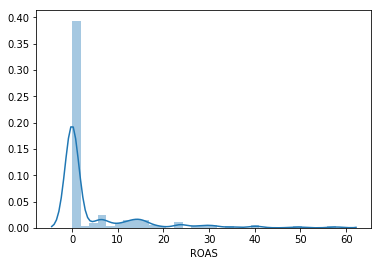

In [135]:
sns.distplot(merge_end['ROAS']);

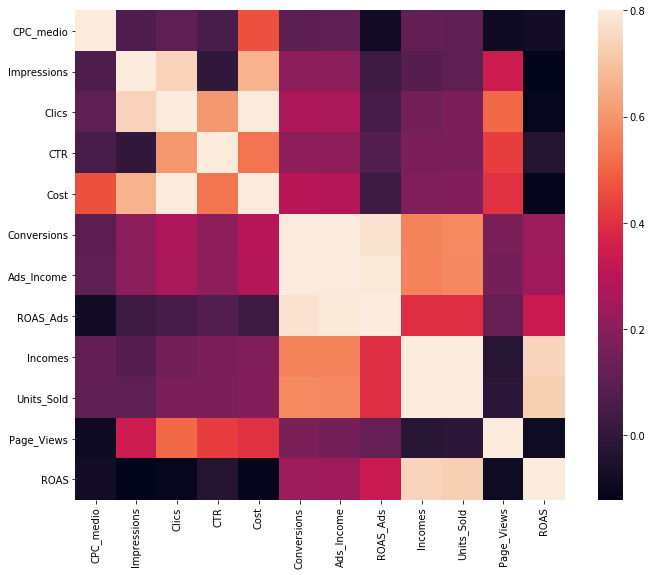

In [136]:
corrmat = merge_end.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [137]:
corr_matrix = merge_end.corr()
corr_matrix["ROAS"].sort_values(ascending=False)

ROAS           1.000000
Incomes        0.742615
Units_Sold     0.730277
ROAS_Ads       0.335046
Ads_Income     0.241846
Conversions    0.235554
CTR           -0.032328
CPC_medio     -0.076559
Page_Views    -0.087810
Clics         -0.109895
Cost          -0.112955
Impressions   -0.121058
Name: ROAS, dtype: float64

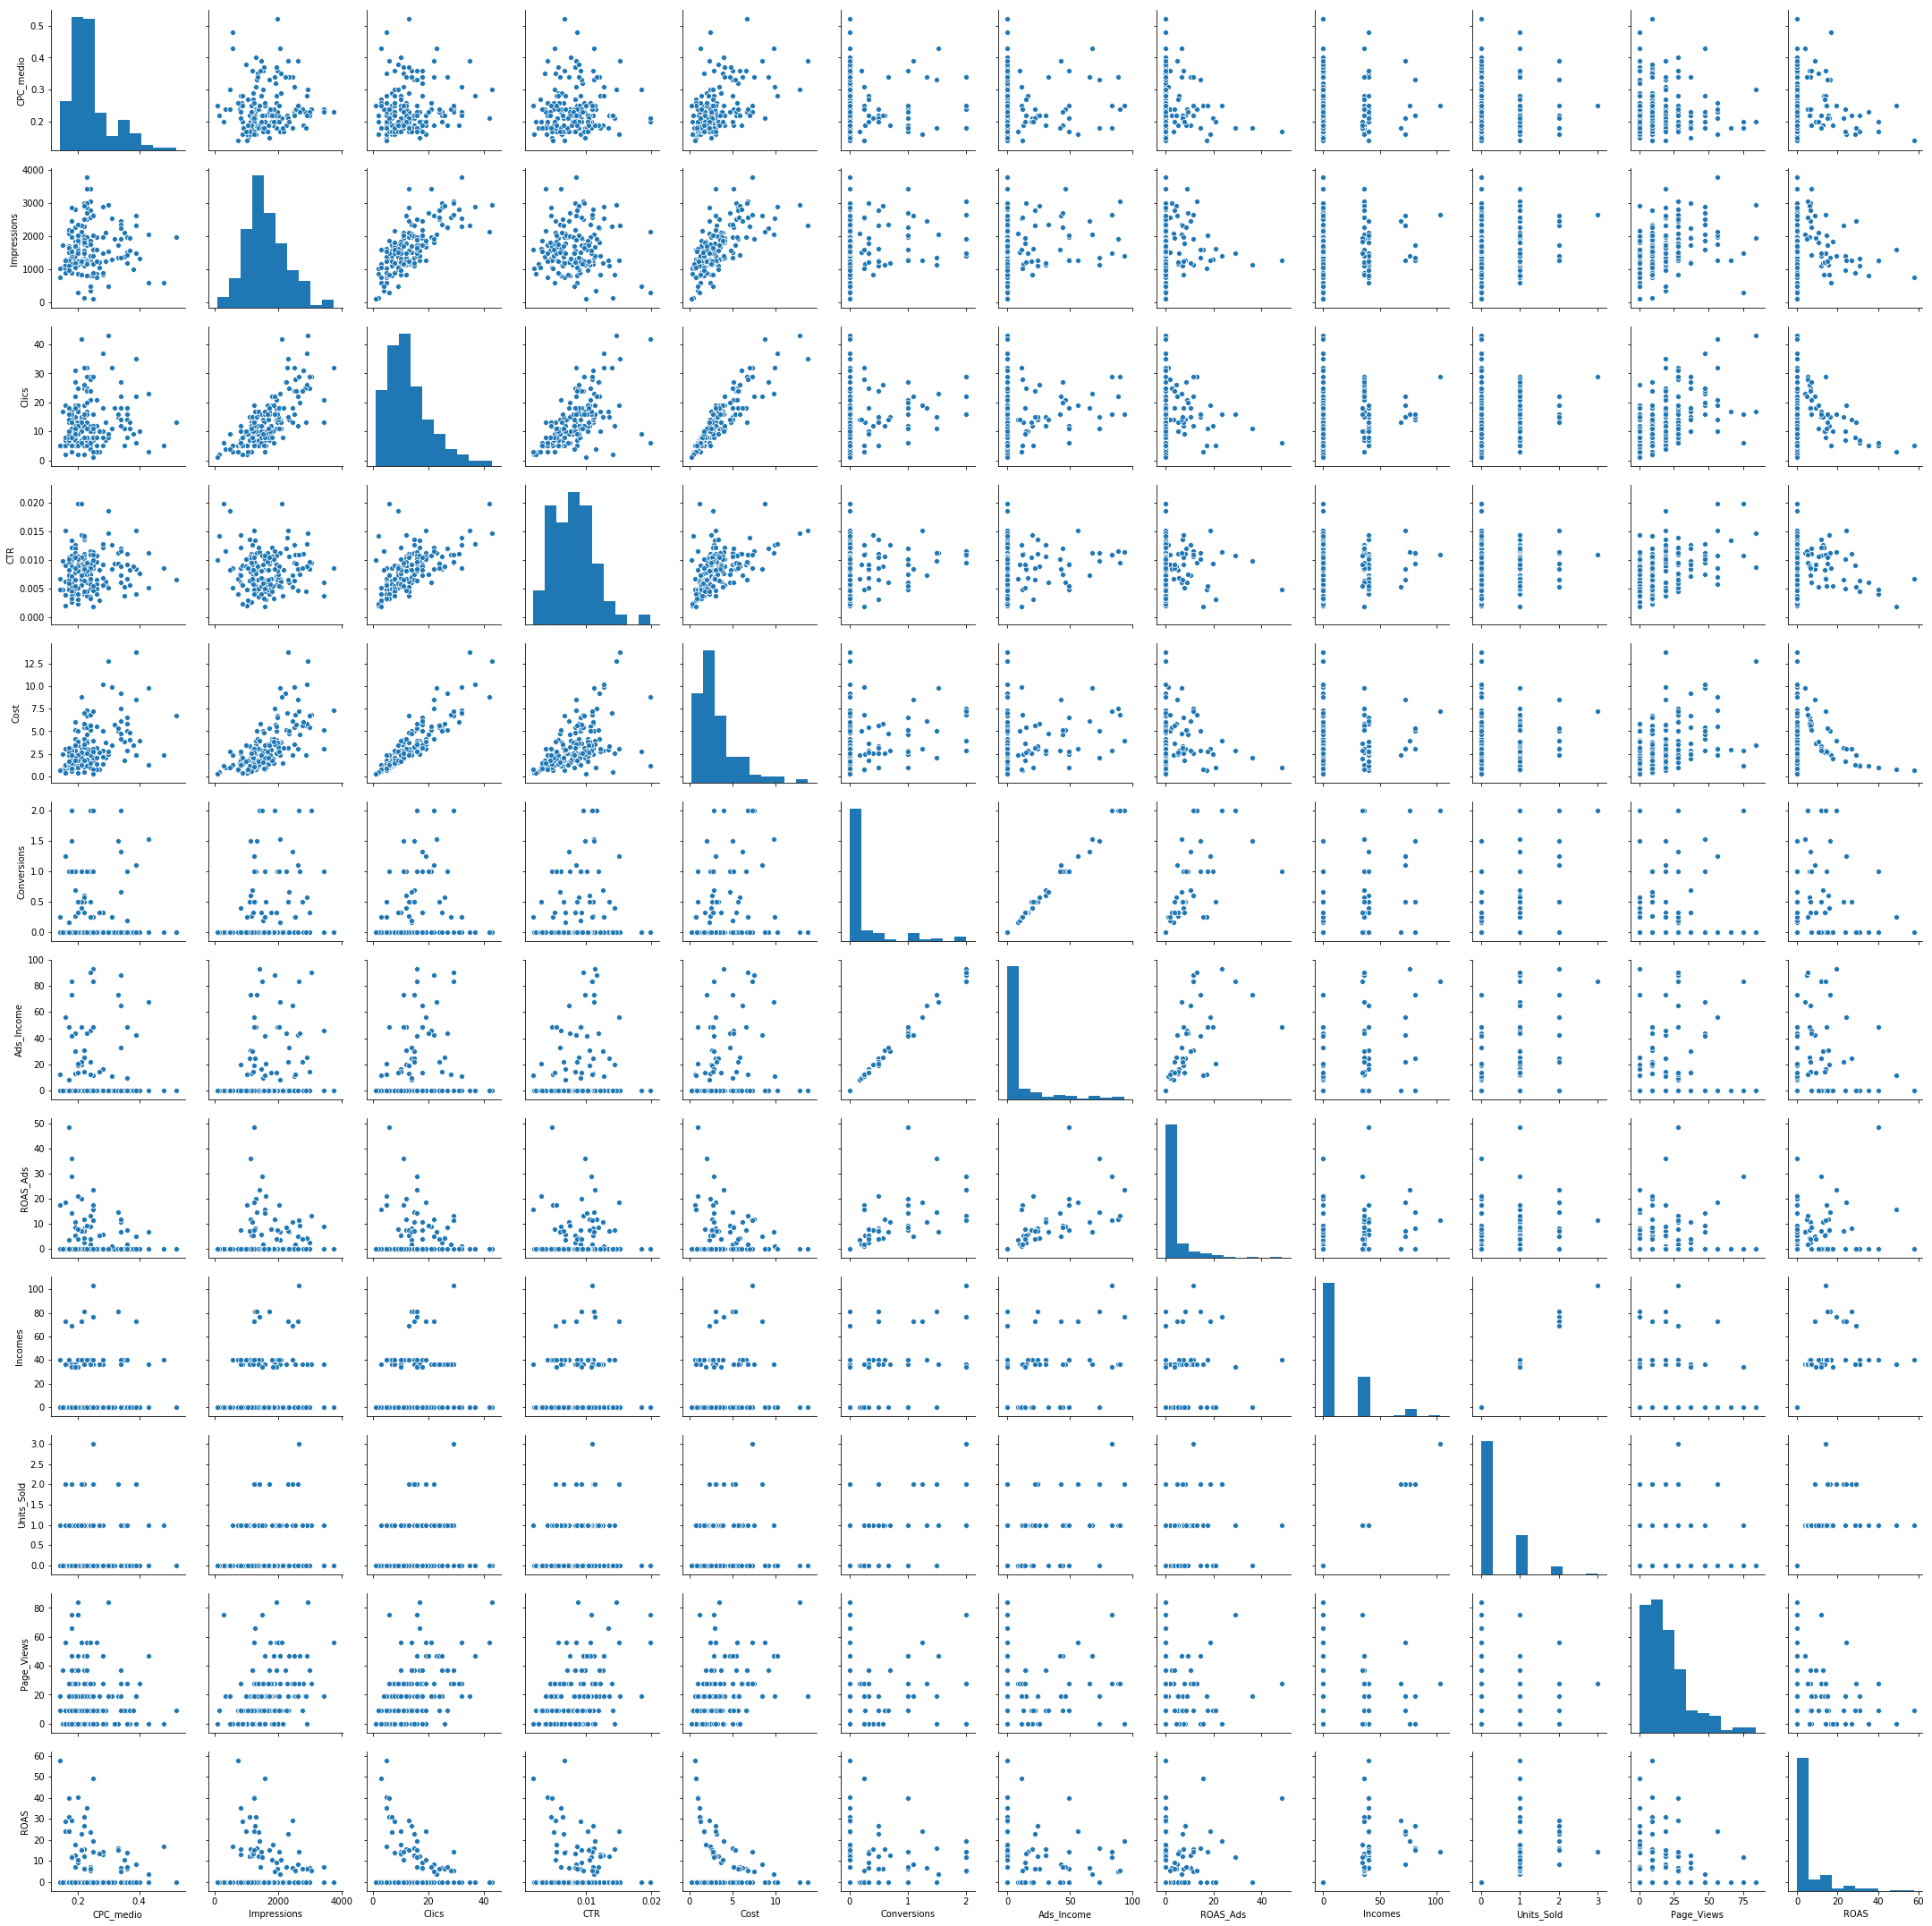

In [138]:
sns.pairplot(merge_end)

In [143]:
#import model
from sklearn.linear_model import LinearRegression
#from sklearn import linear_model

In [144]:
#save the model to an object
reg = LinearRegression()

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [147]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [148]:
reg.intercept_

13.086052413813846

In [149]:
print(reg.coef_)

[-2.77212235e+01 -2.16244041e-03 -2.20961492e-01 -5.06280732e+02
  1.04463356e+00 -1.20596797e+01  4.77497730e-02  4.53513799e-01
  7.12673168e-01 -1.13881476e+01  4.82840668e-02]


In [150]:
pred = reg.predict(X_test)
pred

array([ 0.65175695, 15.78613461, -2.72439979,  0.25346328, -3.4051755 ,
       -2.11898887,  1.48472862,  1.611833  , -0.94634155, -2.50252298,
       17.41631875,  1.11952731, -1.1961037 , -0.49028309,  0.50719489,
       -4.7467743 , -2.26448254,  1.59615548,  1.99807862, 14.03686408,
        7.26805425,  2.38307749, -2.22992453, -2.39037607, -4.36168962,
        8.58384918, -2.02116629,  0.16102258,  7.74699564,  0.93291477,
        0.06850371, 25.05563969, -2.60378535, 15.59178892,  1.93073686,
        1.56261648, -0.68343067, 33.96328809, 18.98772292,  0.29998213,
       -0.2720718 , 14.72450048,  2.49318659, 14.17223932,  3.14269882,
        0.35017902, 19.36372458,  0.06994264, -1.26091166,  2.40914608,
       -0.78802613, 15.60194147, 12.81963516, -1.06603011])

In [151]:
#MSE
round(np.mean((reg.predict(X_test)-y_test)**2),3)

12.964

In [152]:
coeff_df = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])  
coeff_df 

,Coefficient
CPC_medio,-27.721223
Impressions,-0.002162
Clics,-0.220961
CTR,-506.280732
Cost,1.044634
Conversions,-12.059680
Ads_Income,0.047750
ROAS_Ads,0.453514
Incomes,0.712673
Units_Sold,-11.388148


In [153]:
from sklearn.metrics import mean_absolute_error

In [154]:
mean_absolute_error(reg.predict(X_test), y_test)

2.266638576530454

In [155]:
MAPE = np.mean(np.abs(y_test-pred)/y_test) ### da error

In [156]:
MAPE

inf

In [157]:
reg.score(X_test, y_test)

0.8585908401598847

In [158]:
reg.coef_.tolist()

[-27.721223470960982,
 -0.0021624404090400846,
 -0.22096149224371248,
 -506.28073204628976,
 1.0446335581570638,
 -12.059679685850542,
 0.04774977297059543,
 0.4535137989205759,
 0.7126731683905372,
 -11.388147584382274,
 0.04828406680003963]

In [159]:
names = [i for i in list(X)]
names

['CPC_medio',
 'Impressions',
 'Clics',
 'CTR',
 'Cost',
 'Conversions',
 'Ads_Income',
 'ROAS_Ads',
 'Incomes',
 'Units_Sold',
 'Page_Views']

In [160]:
pd.DataFrame(zip(names, reg.coef_.tolist()), columns = ["names", "coefficients"])

,names,coefficients
0,CPC_medio,-27.721223
1,Impressions,-0.002162
2,Clics,-0.220961
3,CTR,-506.280732
4,Cost,1.044634
5,Conversions,-12.059680
6,Ads_Income,0.047750
7,ROAS_Ads,0.453514
8,Incomes,0.712673
9,Units_Sold,-11.388148


In [161]:
y_pred = reg.predict(X_test)  

In [162]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
109,0.000000,0.651757
31,14.031250,15.786135
87,0.000000,-2.724400
177,0.000000,0.253463
135,0.000000,-3.405175
159,0.000000,-2.118989
179,0.000000,1.484729
110,0.000000,1.611833
53,0.000000,-0.946342
90,0.000000,-2.502523


In [163]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 2.266638576530454
Mean Squared Error: 12.96351814845812
Root Mean Squared Error: 3.600488598573549


In [172]:
import matplotlib.pyplot as plt

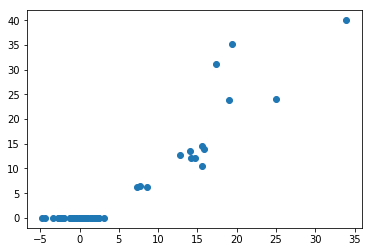

In [173]:
plt.scatter(reg.predict(X_test), y_test)
plt.show()

In [174]:
#Select important variables for the model

In [175]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [176]:
model1=sm.OLS(y_train,X_train)

In [177]:
result=model1.fit()

In [178]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   ROAS   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     24.99
Date:                Wed, 01 May 2019   Prob (F-statistic):           1.36e-25
Time:                        08:47:58   Log-Likelihood:                -404.33
No. Observations:                 126   AIC:                             830.7
Df Residuals:                     115   BIC:                             861.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
CPC_medio       3.4308     12.700      0.270      

In [179]:
#Seleccionamos solo variables por debajo de p < 0,05
model2=sm.OLS(y_train,X_train[["Incomes", "ROAS_Ads"]])

In [180]:
result=model2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   ROAS   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     92.34
Date:                Wed, 01 May 2019   Prob (F-statistic):           2.77e-25
Time:                        08:48:40   Log-Likelihood:                -423.79
No. Observations:                 126   AIC:                             851.6
Df Residuals:                     124   BIC:                             857.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Incomes        0.3307      0.027     12.229      0.0

# Gradient Boosting

In [181]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [182]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [183]:
clf.score(X_test,y_test)

0.9547314378937416

In [191]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor

In [187]:
from sklearn.model_selection import cross_val_score
cross_val_score(reg,X,y,scoring="neg_mean_absolute_error").mean()

/home/miguel/my_project_python/my_project_env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


-3.6896744536018358

In [190]:
y_pred = clf.predict(X_test)

In [193]:
from sklearn.metrics import mean_squared_error

model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)

In [194]:
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 2.0371


In [184]:
feature_labels = np.array(['CPC_medio', 'Impressions', 'Clics', 'CTR', 
               'Cost', 'Conversions', 'Ads_Income', 'ROAS_Ads', 
               'Incomes', 'Units_Sold','Page_Views'])

In [195]:
importance = clf.feature_importances_

In [196]:
feature_indexes_by_importance = importance.argsort()

In [197]:
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

Page_Views-0.01%
Ads_Income-0.03%
ROAS_Ads-0.06%
Impressions-0.19%
CPC_medio-0.19%
Conversions-0.23%
CTR-1.10%
Clics-5.25%
Units_Sold-17.07%
Cost-31.95%
Incomes-43.92%


In [ ]:
feature_labels = np.array(['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'yearbuilt', 'zindexvalue', 
                           'high_price_high_freq', 'high_price_low_freq', 'low_price', 'Apartment', 'Condominium', 'Cooperative', 
                          'Duplex', 'Miscellaneous', 'Mobile', 'MultiFamily2To4', 'MultiFamily5Plus', 'SingleFamily', 
                           'Townhouse'])
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

## K Neighbors Regressor

In [219]:
from sklearn.neighbors import KNeighborsRegressor

In [220]:
regk = KNeighborsRegressor(n_neighbors=4)

In [221]:
regk.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=2,
          weights='uniform')

In [240]:
mean_absolute_error(y_test,regk.predict(X_test))

6.834357468430779

### Error evolution with number of neighbors

In [238]:
maes=[]
for i in range(4,100):
    regk = KNeighborsRegressor(n_neighbors=i)
    regk.fit(X_train,y_train)
    maes.append(mean_absolute_error(y_test,regk.predict(X_test)))

In [239]:
np.mean(y_train)

4.576342696985024

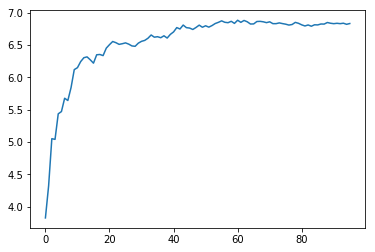

In [241]:
plt.plot(maes)

In [242]:
#no entiendo bien porque el maes cambia

In [243]:
from sklearn.metrics import mean_squared_error

In [244]:
np.sqrt(mean_squared_error(y_test,regk.predict(X_test)))

9.522224354993448

In [245]:
from sklearn.metrics import r2_score

In [253]:
from sklearn.metrics import accuracy_score

In [256]:
y_pred = regk.predict(X_test)

In [258]:
accuracy_score(y_test, y_pred)

ValueError: continuous is not supported

-----------
NO HE CONSEGUIDO SACAR LOS DATOS DE R2 EN KNN

------------

## Cross Validation

In [259]:
from sklearn.model_selection import cross_val_score

In [260]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [261]:
cross_val_score(regk,X,y,cv=5,scoring="neg_mean_absolute_error").mean()

-6.87682903081871

In [262]:
regk = KNeighborsRegressor(n_neighbors=19)

In [263]:
cross_val_score(regk,X,y,cv=5,scoring="neg_mean_absolute_error").mean()

-6.606755143080266

In [264]:
regl = LinearRegression()
cross_val_score(regl,X,y,cv=5,scoring="neg_mean_absolute_error").mean()

-3.425243348490876

In [268]:
reg_final = LinearRegression()
reg_final.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [269]:
np.sqrt(mean_squared_error(y_test,reg_final.predict(X_test)))

3.3651816832090167

## Grid Search CV

In [270]:
from sklearn.model_selection import GridSearchCV

In [285]:
reg_cv= GridSearchCV(KNeighborsRegressor(),
                  param_grid={"n_neighbors":np.arange(4,100)},
                  cv=5,
                  scoring="neg_mean_absolute_error",
                     verbose=False)

In [286]:
reg_cv

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 4,  5, ..., 98, 99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=False)

In [287]:
reg_cv.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 4,  5, ..., 98, 99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=False)

In [ ]:
reg_cv.

In [273]:
reg_cv.best_params_

{'n_neighbors': 4}

In [274]:
reg_cv.best_score_

-4.486660194570956

In [276]:
reg_cv_final = reg_cv.best_estimator_

In [278]:
reg_cv_final

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=2,
          weights='uniform')

In [288]:
mean_absolute_error(reg_cv.predict(X_test), y_test)

2.4579585616110324

In [289]:
np.sqrt(mean_squared_error(y_test,reg_cv.predict(X_test)))

5.419612334864985

In [292]:
y_pred = reg_cv.predict(X_test)

In [294]:
r2_score(y_test, y_pred)

0.6796010331064752

## Decision Tree Regressor

In [295]:
from sklearn.tree import DecisionTreeRegressor

In [296]:
regd = DecisionTreeRegressor(max_depth=5)

In [297]:
cross_val_score(regd,X,y,cv=5,scoring="neg_mean_absolute_error").mean()

-1.0185238059502701

In [298]:
reg = GridSearchCV(DecisionTreeRegressor(),
                  param_grid={"max_depth":np.arange(2,8),
                              "min_samples_leaf":[10,30,50,100]},
                  cv=5,
                  scoring="neg_mean_absolute_error")

In [299]:
reg

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]), 'min_samples_leaf': [10, 30, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [300]:
reg.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]), 'min_samples_leaf': [10, 30, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [301]:
reg.best_score_

-1.543118753088641

In [302]:
reg.best_params_

{'max_depth': 6, 'min_samples_leaf': 10}

## Randomized Search CV

In [305]:
from sklearn.model_selection import RandomizedSearchCV

In [306]:
reg = RandomizedSearchCV(DecisionTreeRegressor(),
                  param_distributions={"max_depth":np.arange(2,8),
                              "min_samples_leaf":[10,30,50,100]},
                  cv=5,
                  scoring="neg_mean_absolute_error",
                  n_iter=5      )

In [307]:
reg.fit(X,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params=None, iid='warn', n_iter=5, n_jobs=None,
          param_distributions={'max_depth': array([2, 3, 4, 5, 6, 7]), 'min_samples_leaf': [10, 30, 50, 100]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [308]:
reg.best_score_

-2.590698908270763

In [309]:
reg.best_params_

{'min_samples_leaf': 30, 'max_depth': 4}

In [311]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import io

ModuleNotFoundError: No module named 'pydotplus'